

The graded quiz for this course is split into two parts; Part 1 (Question 1 to 10) and Part 2 (Question 11 to 20)

In the second part of the quiz, we’ll explore and build time series forecasting models for measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years.

Data Set Information

Data Link: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).

Notes:

1. (globalactivepower*1000/60 - submetering1 - submetering2 - submetering3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2. The dataset contains some missing values in the measurements (nearly 1.25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

Attribute Information:

    date: Date in format dd/mm/yyyy
    time: time in format hh:mm:ss
    globalactivepower: household global minute-averaged active power (in kilowatt)
    globalreactivepower: household global minute-averaged reactive power (in kilowatt)
    voltage: minute-averaged voltage (in volt)
    global_intensity: household global minute-averaged current intensity (in ampere)
    submetering1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
    submetering2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
    submetering3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.<br>



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
elect_cons = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';', na_values=['?'])
elect_cons.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
elect_cons[elect_cons.isna().any(axis=1)].head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = elect_cons.copy()

df.index = df.Date + ' ' + df.Time

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
16/12/2006 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
16/12/2006 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
16/12/2006 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
16/12/2006 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
16/12/2006 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
df = df.drop(['Date', 'Time'], axis=1)



In [7]:
df.index = pd.to_datetime(df.index)

In [8]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
df = pd.DataFrame(imp.fit_transform(df), columns=df.columns, index=df.index)

df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [9]:
for col in df.columns:
  df[col] = df[col].replace(0, df[col].mean())
  # print(df[col].mean())

df.tail(20)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2010-11-26 20:43:00,0.988,0.106000,239.64,4.2,1.121923,1.00000,6.458447
2010-11-26 20:44:00,0.982,0.102000,238.69,4.0,1.121923,1.00000,6.458447
2010-11-26 20:45:00,0.972,0.092000,238.32,4.0,1.121923,2.00000,6.458447
2010-11-26 20:46:00,0.908,0.123714,238.53,3.8,1.121923,1.00000,6.458447
2010-11-26 20:47:00,0.910,0.123714,238.71,3.8,1.121923,1.00000,6.458447
2010-11-26 20:48:00,0.912,0.123714,239.25,3.8,1.121923,1.00000,6.458447
2010-11-26 20:49:00,0.948,0.123714,238.16,4.0,1.121923,1.00000,6.458447
2010-11-26 20:50:00,1.198,0.128000,238.11,5.0,1.121923,1.00000,6.458447
2010-11-26 20:51:00,1.024,0.106000,238.84,4.2,1.121923,1.00000,6.458447
2010-11-26 20:52:00,0.946,0.123714,239.05,4.0,1.121923,1.29852,6.458447


In [10]:
df_daily = df.resample('D').sum()

# df_daily.isnull().sum()

In [11]:
df_daily.mode()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.0,0.0,0.0,0.0,1615.569566,0.0,0.0


In [73]:
# for col in df_daily.columns:
#   df_daily[col] = df_daily[col].replace(0, df_daily[col].mean())

In [12]:
df_daily.tail(30)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2010-11-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-11-13,2023.174000,202.882063,344639.150000,8524.200000,2538.670309,1822.593970,17941.197177
2010-11-14,2038.392000,223.859460,344562.910000,8686.600000,6651.040656,1822.848089,14764.356042
2010-11-15,1747.382000,168.284064,344950.910000,7381.000000,2566.036079,5329.637533,14853.313121
2010-11-16,1509.748000,173.805205,347324.560000,6341.200000,1615.569566,1847.938566,14329.945989
2010-11-17,1582.032000,171.607474,347691.230000,6669.000000,2640.670309,1838.863727,14947.189832
2010-11-18,1652.152000,227.846033,347064.120000,7022.800000,3599.842603,1843.356327,15280.977963
2010-11-19,1570.400000,159.794914,345667.330000,6593.000000,1615.569566,1842.550406,16841.795333
2010-11-20,2197.006000,191.253486,346476.000000,9320.200000,5603.359487,4158.519130,16489.964281
2010-11-21,900.910000,143.872037,347299.480000,3798.600000,1615.569566,1855.162247,12315.008066


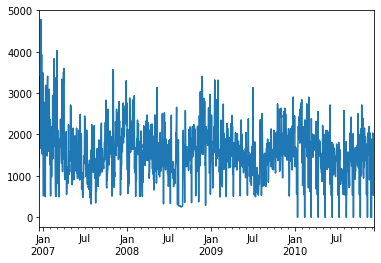

In [13]:
df_daily.Global_active_power.plot()

In [14]:
from scipy.stats import pearsonr

coef_act_react, _ = pearsonr(df_daily.Global_active_power, df_daily.Global_reactive_power)

print(round(coef_act_react, 2))

0.14


In [15]:
from scipy.stats import pearsonr

coef_vol_int, _ = pearsonr(df_daily.Voltage, df_daily.Global_intensity)

print(round(coef_vol_int, 2))

0.27


In [16]:
from fbprophet import Prophet

X_train, X_test = df_daily[:-365], df_daily[-365:]

len(X_test)

365

In [17]:
df1_train, df1_test = X_train['Global_active_power'].to_frame(),  X_test['Global_active_power'].to_frame()

df1_test.head()

,Global_active_power
2009-12-12,1816.380
2009-12-13,2138.814
2009-12-14,1794.862
2009-12-15,1940.116
2009-12-16,1394.874


In [18]:
df1_train.reset_index(inplace=True)
df1_test.reset_index(inplace=True)

In [19]:
df1_train.head()

,index,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [20]:
df1_train = df1_train.rename(columns={'index': 'ds', 'Global_active_power': 'y'})
df1_test = df1_test.rename(columns={'index': 'ds', 'Global_active_power': 'y'})

model1 = Prophet()
model1.fit(df1_train)

future = model1.make_future_dataframe(periods=365, freq='D')
forecast = model1.predict(future)
forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1653.432610,1474.269976,2841.654066,1653.432610,1653.432610,492.937931,492.937931,492.937931,149.605592,149.605592,149.605592,343.332340,343.332340,343.332340,0.0,0.0,0.0,2146.370541
1,2006-12-17,1653.262155,1493.210573,2868.897532,1653.262155,1653.262155,496.446475,496.446475,496.446475,138.197189,138.197189,138.197189,358.249286,358.249286,358.249286,0.0,0.0,0.0,2149.708630
2,2006-12-18,1653.091700,1251.923751,2645.633525,1653.091700,1653.091700,272.479358,272.479358,272.479358,-101.329779,-101.329779,-101.329779,373.809137,373.809137,373.809137,0.0,0.0,0.0,1925.571058
3,2006-12-19,1652.921245,1356.133899,2752.072584,1652.921245,1652.921245,391.300105,391.300105,391.300105,1.644264,1.644264,1.644264,389.655841,389.655841,389.655841,0.0,0.0,0.0,2044.221349
4,2006-12-20,1652.750789,1269.314583,2727.355172,1652.750789,1652.750789,368.288004,368.288004,368.288004,-37.130209,-37.130209,-37.130209,405.418213,405.418213,405.418213,0.0,0.0,0.0,2021.038793


In [21]:
def mape_func(ytrue, ypred):
  y_true, y_pred = np.array(ytrue), np.array(ypred)
  mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-5))) * 100
  return mape

ypred = forecast['yhat'][-365:]

In [22]:
ypred.tail()

1452    1793.644801
1453    1754.483786
1454    1680.326140
1455    1758.426942
1456    1951.725379
Name: yhat, dtype: float64

In [23]:
ytrue = df1_test['y']
mape1 = mape_func(ytrue, ypred)

print(mape1)

651166338.5893519


In [24]:
from sklearn.metrics import mean_squared_error

rmse1 = np.sqrt(mean_squared_error(ytrue, ypred))

print(rmse1)

562.333156105128


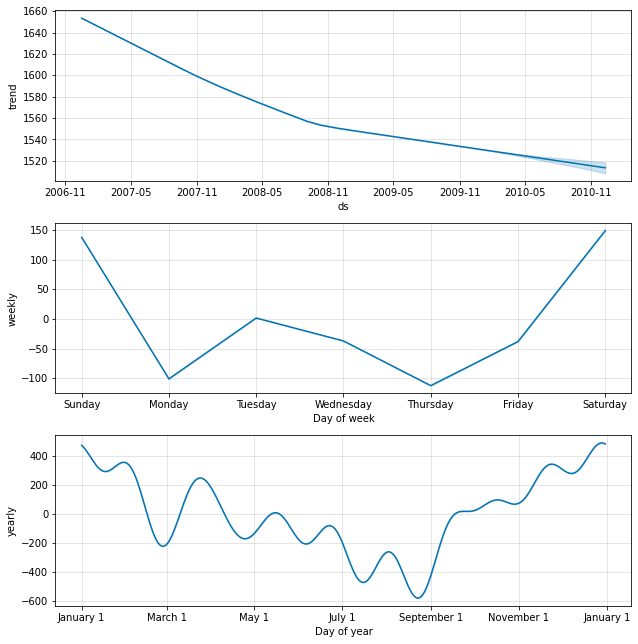

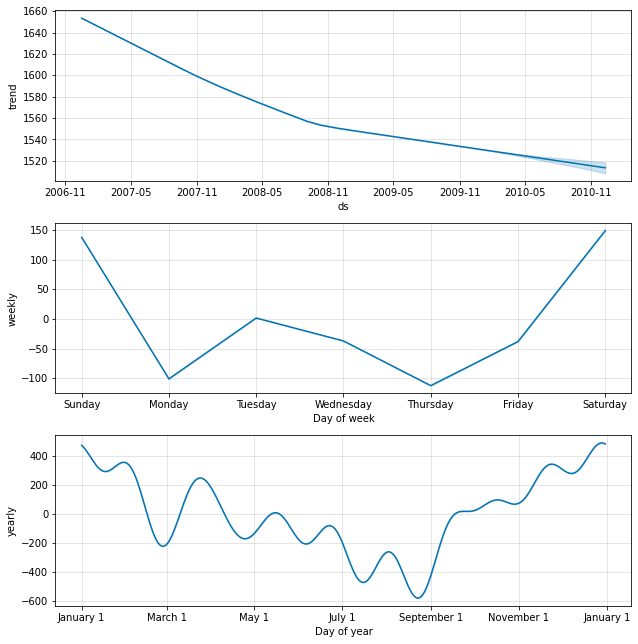

In [25]:
model1.plot_components(forecast)

In [47]:
regressors = ['Global_active_power', 'Global_reactive_power', 'Voltage','Global_intensity',
              'Sub_metering_1','Sub_metering_2','Sub_metering_3']


new_names = ['y', 'add1', 'add2', 'add3',
             'add4', 'add5', 'add6']

new_dict = dict(zip(regressors, new_names))

new_dict.update({'index': 'ds'})

new_dict

{'Global_active_power': 'y',
 'Global_intensity': 'add3',
 'Global_reactive_power': 'add1',
 'Sub_metering_1': 'add4',
 'Sub_metering_2': 'add5',
 'Sub_metering_3': 'add6',
 'Voltage': 'add2',
 'index': 'ds'}

In [31]:
df2_train, df2_test = X_train[regressors],  X_test[regressors]

In [32]:
df2_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2006-12-16,1209.176,48.530592,93552.53,5180.8,444.281631,866.734432,5597.678525
2006-12-17,3390.460,249.511750,345725.32,14398.6,3485.890686,5273.861213,17655.242835
2006-12-18,2203.826,208.061214,347373.64,9247.2,2596.669164,3997.431166,18151.406309
2006-12-19,1666.194,212.551809,348479.01,7094.0,2420.911867,8631.726335,13191.498488
2006-12-20,2225.748,212.092079,348923.61,9313.0,1615.569566,4025.729686,18215.781651


In [33]:
df2_train.reset_index(inplace=True)
df2_test.reset_index(inplace=True)

In [34]:
df2_test.tail()

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
360,2010-12-07,1109.574,298.159733,345914.85,4892.0,3158.939913,1880.892490,8936.960680
361,2010-12-08,529.698,224.645800,346744.70,2338.2,1615.569566,1883.938566,6804.341495
362,2010-12-09,1612.092,234.637194,347932.40,6848.2,3190.575287,2829.246022,11093.330549
363,2010-12-10,1579.692,203.052336,345975.37,6741.2,2648.888397,1901.921252,11975.579865
364,2010-12-11,1836.822,178.113756,343926.57,7826.2,3421.624514,1832.968167,15720.178885


In [48]:
df2_train = df2_train.rename(columns=new_dict)
df2_test = df2_test.rename(columns=new_dict)

df2_train.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,48.530592,93552.53,5180.8,444.281631,866.734432,5597.678525
1,2006-12-17,3390.460,249.511750,345725.32,14398.6,3485.890686,5273.861213,17655.242835
2,2006-12-18,2203.826,208.061214,347373.64,9247.2,2596.669164,3997.431166,18151.406309
3,2006-12-19,1666.194,212.551809,348479.01,7094.0,2420.911867,8631.726335,13191.498488
4,2006-12-20,2225.748,212.092079,348923.61,9313.0,1615.569566,4025.729686,18215.781651


In [49]:
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2.add_regressor('add4')
model2.add_regressor('add5')
model2.add_regressor('add6')

model2.fit(df2_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future2 = model2.make_future_dataframe(periods=365, freq='D', include_history=False)
future2['add1'] = df2_test['add1'].values
future2['add2'] = df2_test['add2'].values
future2['add3'] = df2_test['add3'].values
future2['add4'] = df2_test['add4'].values
future2['add5'] = df2_test['add5'].values
future2['add6'] = df2_test['add6'].values

forecast2 = model2.predict(future2)

forecast2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,add3,add3_lower,add3_upper,add4,add4_lower,add4_upper,add5,add5_lower,add5_upper,add6,add6_lower,add6_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
360,2010-12-07,1603.590585,1030.292879,1253.840769,1489.987528,1713.086875,-20.177757,-20.177757,-20.177757,-0.121489,-0.121489,-0.121489,-433.481230,-433.481230,-433.481230,-0.052113,-0.052113,-0.052113,1.412072,1.412072,1.412072,-8.013642,-8.013642,-8.013642,-458.455081,-458.455081,-458.455081,-460.434158,-460.434158,-460.434158,-1.186273,-1.186273,-1.186273,3.165350,3.165350,3.165350,0.0,0.0,0.0,1145.135504
361,2010-12-08,1603.624120,437.061164,663.265727,1489.683376,1713.416511,-1.513581,-1.513581,-1.513581,0.246641,0.246641,0.246641,-1047.526032,-1047.526032,-1047.526032,3.583061,3.583061,3.583061,1.408992,1.408992,1.408992,-11.962415,-11.962415,-11.962415,-1050.127084,-1050.127084,-1050.127084,-1055.763333,-1055.763333,-1055.763333,1.865585,1.865585,1.865585,3.770663,3.770663,3.770663,0.0,0.0,0.0,553.497036
362,2010-12-09,1603.657656,1520.237707,1748.189548,1489.379223,1713.746146,-4.050258,-4.050258,-4.050258,0.773518,0.773518,0.773518,36.874490,36.874490,36.874490,-0.126625,-0.126625,-0.126625,0.453007,0.453007,0.453007,-4.020892,-4.020892,-4.020892,34.136603,34.136603,34.136603,29.903239,29.903239,29.903239,-0.210533,-0.210533,-0.210533,4.443896,4.443896,4.443896,0.0,0.0,0.0,1637.794258
363,2010-12-10,1603.691191,1505.012577,1731.982726,1489.075071,1714.096480,3.968702,3.968702,3.968702,-0.094641,-0.094641,-0.094641,11.147028,11.147028,11.147028,1.149236,1.149236,1.149236,1.390806,1.390806,1.390806,-2.387313,-2.387313,-2.387313,18.573555,18.573555,18.573555,15.173818,15.173818,15.173818,-1.778859,-1.778859,-1.778859,5.178597,5.178597,5.178597,0.0,0.0,0.0,1622.264746
364,2010-12-11,1603.724727,1779.564150,2008.667737,1488.770918,1714.405417,10.300265,10.300265,10.300265,-1.003511,-1.003511,-1.003511,272.028307,272.028307,272.028307,-0.670826,-0.670826,-0.670826,1.460538,1.460538,1.460538,4.546213,4.546213,4.546213,293.538342,293.538342,293.538342,286.660985,286.660985,286.660985,0.910671,0.910671,0.910671,5.966686,5.966686,5.966686,0.0,0.0,0.0,1897.263069


In [52]:
ypred2 = forecast2['yhat'][-365:]
ytrue2 = df2_test['y']
mape2 = mape_func(ytrue2, ypred2)

print(mape2)

50560722.25937331


In [53]:
from sklearn.metrics import mean_squared_error

rmse2 = np.sqrt(mean_squared_error(ytrue2, ypred2))

print(rmse2)

31.734138977969444


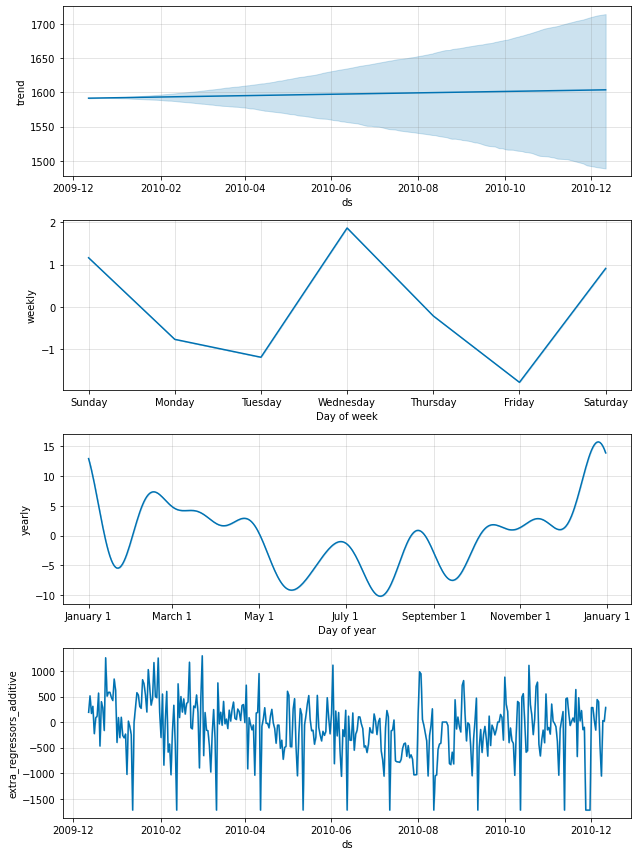

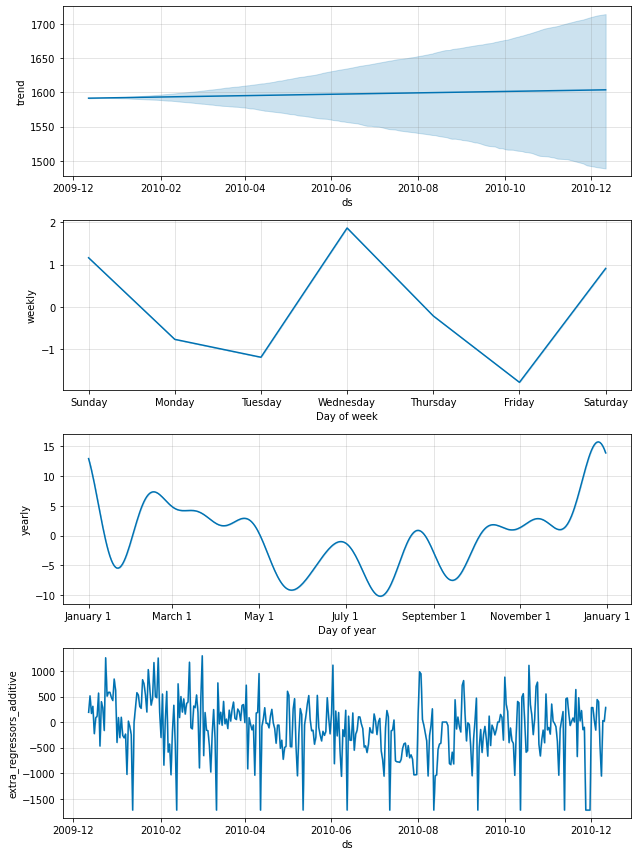

In [54]:
model2.plot_components(forecast2)